# **Japan Used Cars Price Prediction**
**Project Type - Supervised learning (Regression)**

 **Contribution - Individual**

 **Name - Vikash Kumar Diwakar**

# **Project Workflow:**

* **Importing Neccessary Libraries**

* **Data Wrangling**

      1. Gathering Data
          - CSV and others files
          - APIs
          - Web Scraping
          - Databases
      2. Assessing Data
      3. Cleaning Data

* **EDA and Features Engineering on features**

* **Features Transformation and selection**

* **Remove Multicollinearity**

* **model implementation and pre-processing**

      1. Train, Test and Split
      2. preprocessing using column-transformer
      3. make best pipeline
          
* **Fitting the regression models and HyperParameter Tuning**

* **Final selection of the model**

* **Conclusion**

# **Problem Statement:**
• This dataset includes 10 features:

Price:
The sale price of the vehicle in the ad

Mark:
The brand of car

Model :
model of the vehicle

Years :
The vehicle registration year

Mileage :
miles traveled by vehicle

Engine_capacity:
The measurement of the total volume of the
cylinders in the engine

Transmission:
The type of gearbox used by the car

Drive :
wheel drive(2wd, 4wd and awd)

Hand_drive:
Left-hand traffic (LHT) and right-hand traffic
(RHT)

Fuel :
The type of fuel used by the car( gasoline, diesel,
hybrid, lpg and cng)

In [4]:
# import libraries
import pandas as pd
import numpy as np

In [5]:
# loading the dataset
df=pd.read_csv('/content/Japan_used_cars_datasets.csv')

In [6]:
# viewing first five rows
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [7]:
df.shape

(2318, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


In [9]:
df.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [10]:
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.sample(1)

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
2165,2181,1353,mazda,demio,2009,46815,1300,at,2wd,rhd,gasoline


In [13]:
# dropping id column
df.drop(columns=['id'],inplace=True)

In [14]:
df.sample(1)

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
2171,1353,toyota,porte,2004,60076,1300,at,2wd,rhd,gasoline


## **`mark`**

In [15]:
# this column reprents The brand of car
df['mark'].unique()

array(['nissan', 'toyota', 'daihatsu', 'volkswagen', 'mazda', 'honda',
       'subaru', 'mercedes-benz', 'kubota', 'mitsubishi', 'suzuki', 'bmw',
       'chrysler', 'smart', 'gm', 'opel', 'isuzu', 'land rover',
       'peugeot', 'hyundai', 'kia motors', 'audi', 'citroen', 'mitsuoka',
       'volvo', 'ford', 'hino', 'jaguar'], dtype=object)

In [16]:
df_brands=df['mark'].value_counts()
df_brands

mark
toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
volvo               2
land rover          2
peugeot             2
hino                1
mitsuoka            1
ford                1
gm                  1
citroen             1
opel                1
chrysler            1
kubota              1
jaguar              1
Name: count, dtype: int64

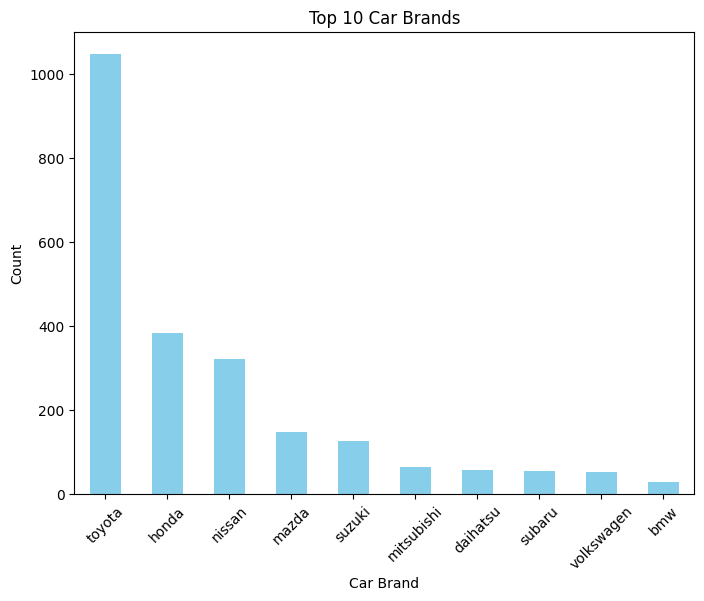

In [17]:
# lets plot a countplot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

top_10_brands = df_brands.head(10)

# Plot the top 10 car brands
plt.figure(figsize=(8, 6))
top_10_brands.plot(kind='bar', color='skyblue')
plt.xlabel('Car Brand')
plt.ylabel('Count')
plt.title('Top 10 Car Brands')
plt.xticks(rotation=45)
plt.show()

In [18]:
df.sample(1)

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
1550,1148,toyota,corolla spacio,2004,56024,1500,at,2wd,rhd,gasoline


In [19]:
df['model'].unique()

array(['march', 'lafesta', 'avensis', 'mira', 'passat', 'bongo van',
       'step wgn', 'sambar', 'inspire', 'mercedes-benz others', 'note',
       'passo', 'impreza', 'kubota others', 'life', 'progres',
       'cube cubic', 'cube', 'a-class', 'coltplus', 'mr wagon',
       'pajero mini', 'fit', 'legacy b4', 'vitz', 'mark ii blit',
       'insight', 'move', 'tanto', 'terios kid', 'az-wagon', 'coo',
       'verisa', 'swift', 'delica d2', 'tiida', 'sienta', 'mini', 'colt',
       'platz', 'bluebird sylphy', 'eclipse', 'bb', 'moco',
       'clipper truck', 'esse', 'ek wagon', 'polo', 'x-trail',
       'atenza sport', 'ad van', 'pixis space', 'freed spike', 'stream',
       'alto', 'raum', 'wish', 'every', 'demio', 'jimny', 'premacy',
       'cr-v', 'lapin', 'delica', 'wagon r', 'lancer', 'naked', 'odyssey',
       'ractis', 'porte', 'corolla rumion', 'tiida latio', 'voxy',
       'carol', 'sunny', 'bongo truck', 'boon', 's-mx', 'pt cruiser',
       'golf', 'ad expert', 'fit hybrid', 'sere

In [20]:
brand_model_counts=df.groupby('mark')['model'].nunique().sort_values(ascending=False)
brand_model_counts=brand_model_counts.head(10).reset_index()
brand_model_counts

,mark,model
0,toyota,64
1,nissan,31
2,honda,26
3,mitsubishi,22
4,mazda,21
5,daihatsu,18
6,suzuki,18
7,subaru,15
8,volkswagen,6
9,mercedes-benz,5


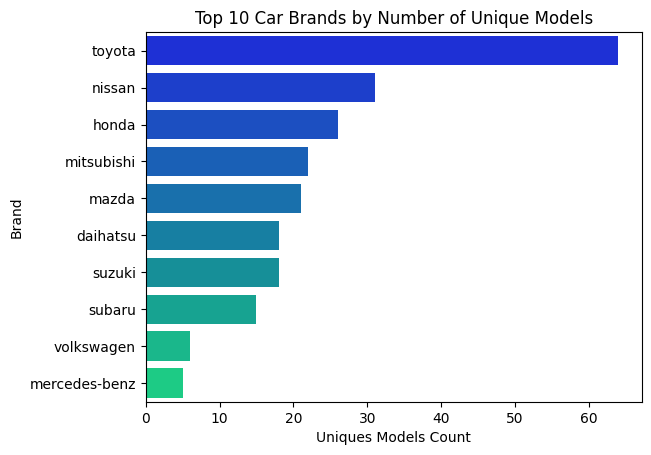

In [21]:
sns.barplot(x='model',y='mark',data=brand_model_counts,palette='winter')
plt.title('Top 10 Car Brands by Number of Unique Models')
plt.xlabel('Uniques Models Count')
plt.ylabel('Brand');

In [22]:
df.sample(1)

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
1467,1120,suzuki,alto,2006,97788,660,at,4wd,rhd,gasoline


In [23]:
df['year'].value_counts()

year
2005    365
2007    318
2003    248
2006    199
2009    199
2004    194
2011    173
2010    153
2008     91
2002     82
2001     77
2013     52
2012     42
1999     32
2000     27
1998     13
1997     13
1996      6
1995      6
1993      5
1994      4
2014      4
1990      4
1991      3
1992      3
1979      1
1982      1
2015      1
1987      1
1988      1
Name: count, dtype: int64

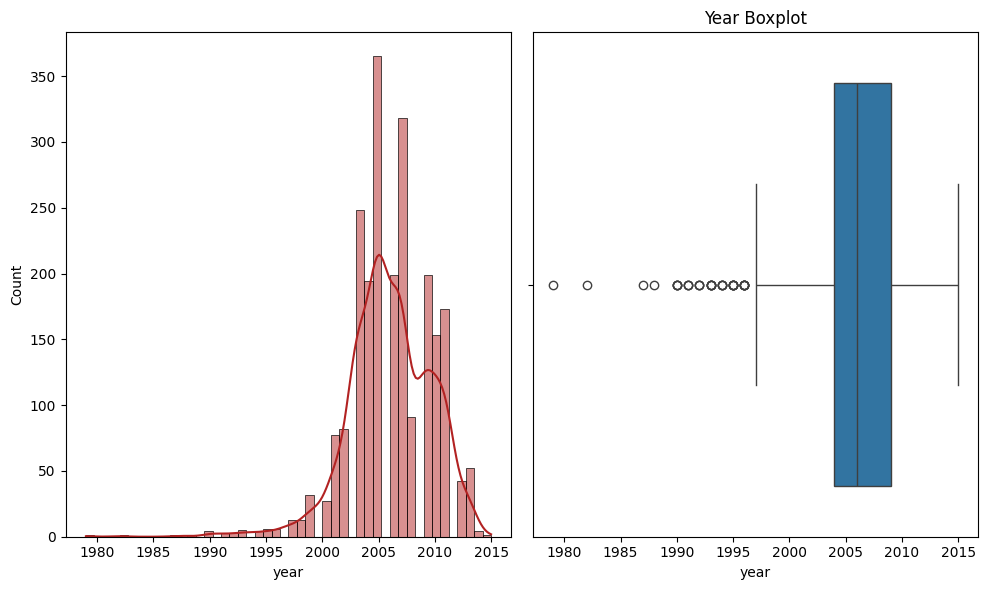

In [24]:
fig,axes=plt.subplots(1,2,figsize=(10,6))

sns.histplot(df['year'],kde=True,color='firebrick',ax=axes[0])
axes[0]=plt.title('Year Distribution')

sns.boxplot(x=df['year'], ax=axes[1])
axes[1]=plt.title('Year Boxplot')

plt.tight_layout()
plt.show()

* **There are outliers in `year` column we will handle it further.**

In [25]:
# creating age column
df['age']=2024-df['year']

In [26]:
df.head()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,age
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,21
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,14
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,19
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,16
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,18


In [27]:
df['age'].value_counts()

age
19    365
17    318
21    248
18    199
15    199
20    194
13    173
14    153
16     91
22     82
23     77
11     52
12     42
25     32
24     27
26     13
27     13
28      6
29      6
31      5
30      4
10      4
34      4
33      3
32      3
45      1
42      1
9       1
37      1
36      1
Name: count, dtype: int64

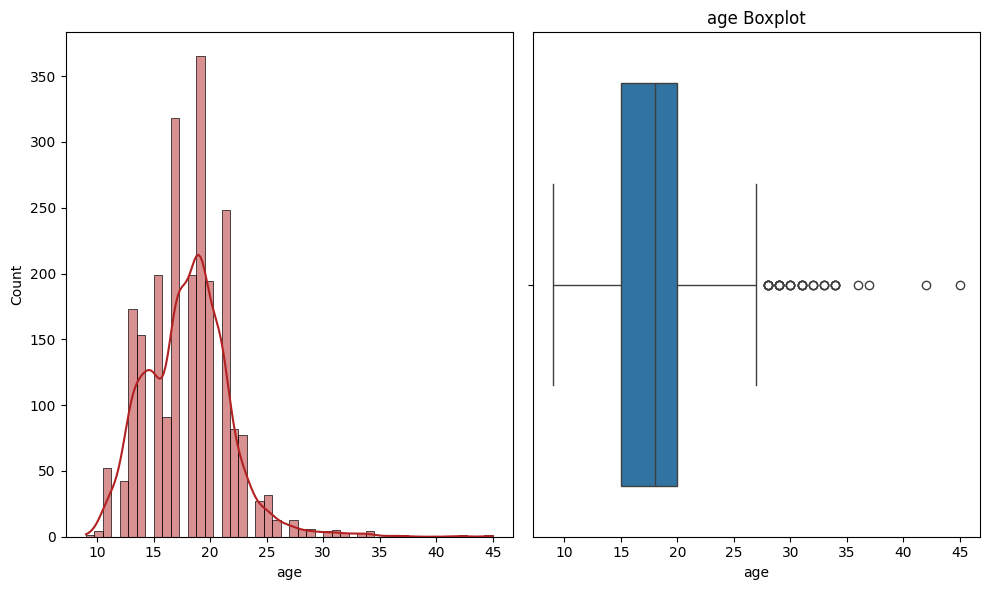

In [28]:
fig,axes=plt.subplots(1,2,figsize=(10,6))

sns.histplot(df['age'],kde=True,color='firebrick',ax=axes[0])
axes[0]=plt.title('age Distribution')

sns.boxplot(x=df['age'], ax=axes[1])
axes[1]=plt.title('age Boxplot')

plt.tight_layout()
plt.show()

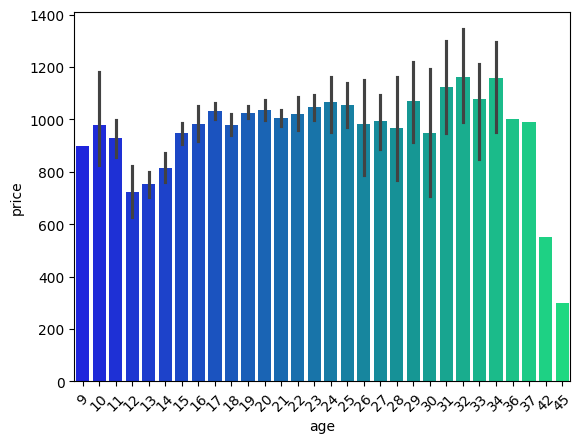

In [29]:
sns.barplot(y='price',x='age',data=df,palette='winter')
plt.xticks(rotation=45);

In [30]:
df['mileage'].value_counts()

mileage
112000    18
81000     17
68000     16
92000     16
94000     15
          ..
52600      1
157802     1
101977     1
147272     1
72320      1
Name: count, Length: 1367, dtype: int64

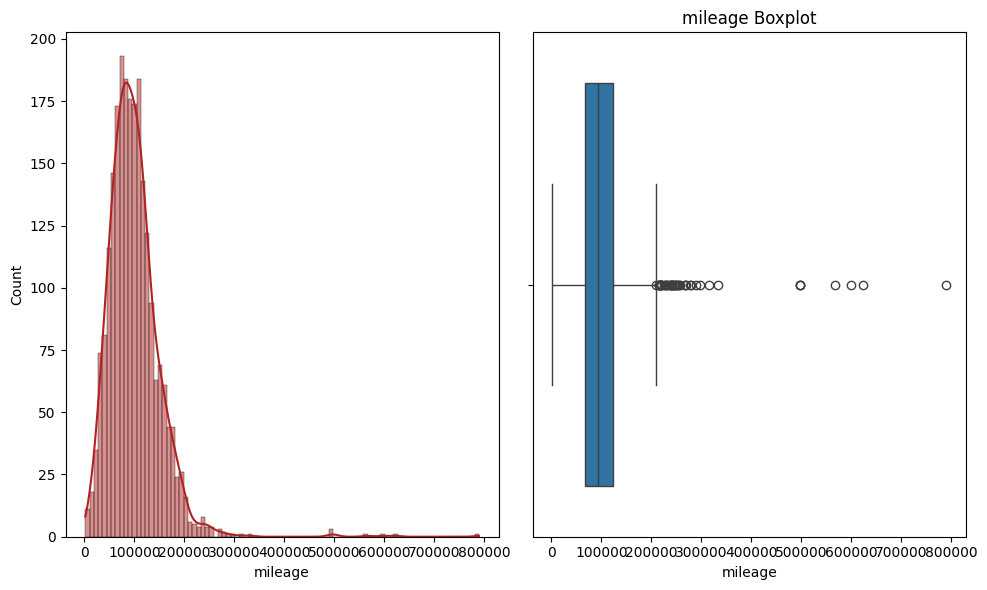

In [31]:
fig,axes=plt.subplots(1,2,figsize=(10,6))

sns.histplot(df['mileage'],kde=True,color='firebrick',ax=axes[0])
axes[0]=plt.title('mileage Distribution')

sns.boxplot(x=df['mileage'], ax=axes[1])
axes[1]=plt.title('mileage Boxplot')

plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Load the dataset

# Select numerical columns for VIF calculation
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Prepare the data
X = df[numerical_columns].dropna()  # Ensure no NaNs are present

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display VIF
print(vif_data)


           Feature        VIF
0            price   1.070658
1             year  36.877899
2          mileage   1.029388
3  engine_capacity   1.064671
4              age  26.154235


In [33]:
df.sample(2)

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,age
461,700,daihatsu,move,2013,143300,660,at,2wd,rhd,gasoline,11
1303,1067,toyota,mark x,2007,10275,3000,at,2wd,rhd,gasoline,17


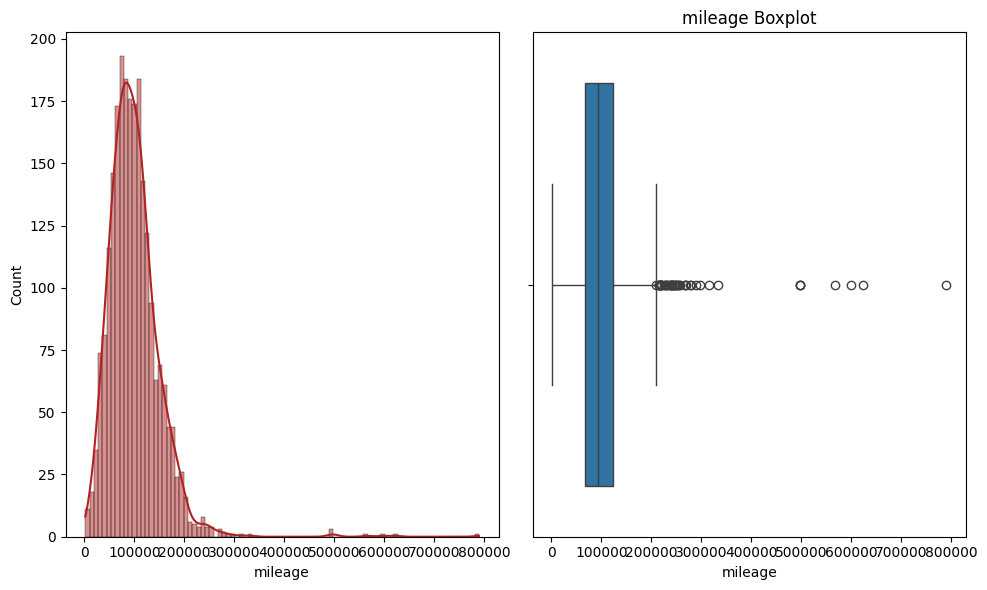

In [34]:
fig,axes=plt.subplots(1,2,figsize=(10,6))

sns.histplot(df['mileage'],kde=True,color='firebrick',ax=axes[0])
axes[0]=plt.title('mileage Distribution')

sns.boxplot(x=df['mileage'], ax=axes[1])
axes[1]=plt.title('mileage Boxplot')

plt.tight_layout()
plt.show()

* **`mileage` column is highly right skewed and also there are many outliers present**

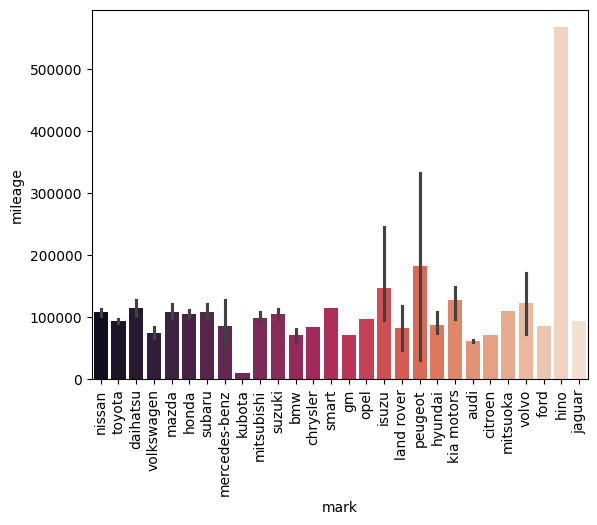

In [35]:
sns.barplot(x='mark',y='mileage',data=df,palette='rocket')
plt.xticks(rotation =90);

In [36]:
df.sample(1)

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,age
284,590,honda,fit,2009,79797,1290,at,2wd,rhd,gasoline,15


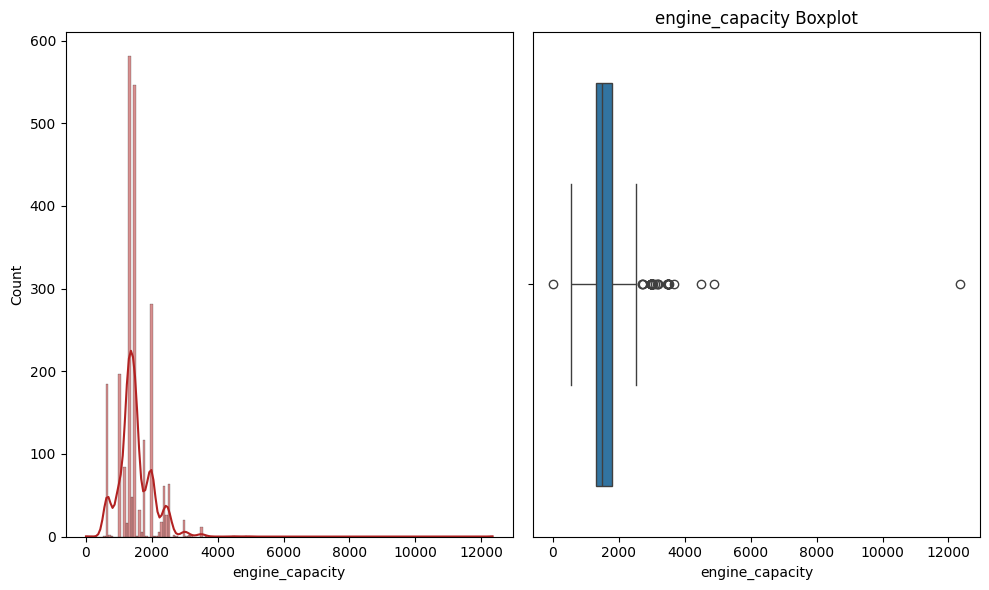

In [37]:
fig,axes=plt.subplots(1,2,figsize=(10,6))

sns.histplot(df['engine_capacity'],kde=True,color='firebrick',ax=axes[0])
axes[0]=plt.title('engine_capacity Distribution')

sns.boxplot(x=df['engine_capacity'], ax=axes[1])
axes[1]=plt.title('engine_capacity Boxplot')

plt.tight_layout()
plt.show()

* **`engine_capacity` column is highly right skewed and also there are many outliers present**

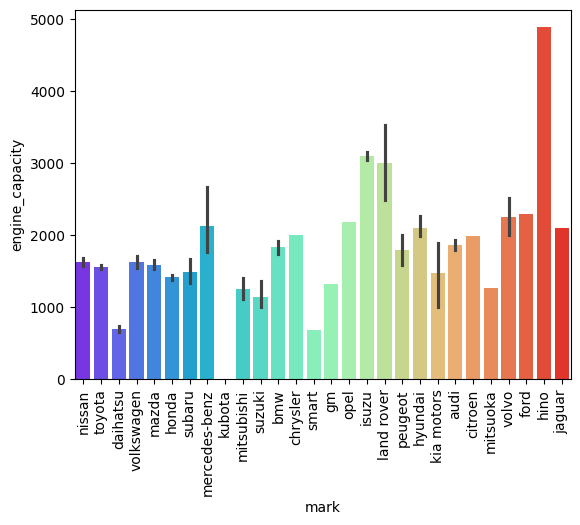

In [38]:
sns.barplot(x='mark',y='engine_capacity',data=df,palette='rainbow')
plt.xticks(rotation=90);

## **`hand_drive`**

<Axes: xlabel='hand_drive'>

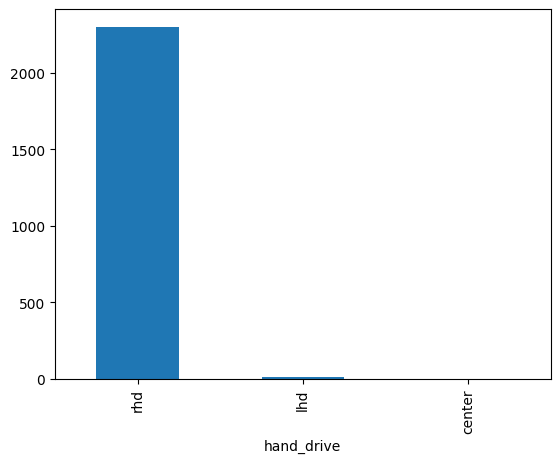

In [39]:
df['hand_drive'].value_counts().plot(kind='bar')

In [40]:
df[df['hand_drive']=='center']

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,age
23,300,kubota,kubota others,1979,9999,9,mt,4wd,center,diesel,45


In [41]:
df = df.drop(index=23).reset_index(drop=True)
df[df['hand_drive']=='center']

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,age


Successfuly deleted the row

## **`fuel`**

<Axes: xlabel='fuel'>

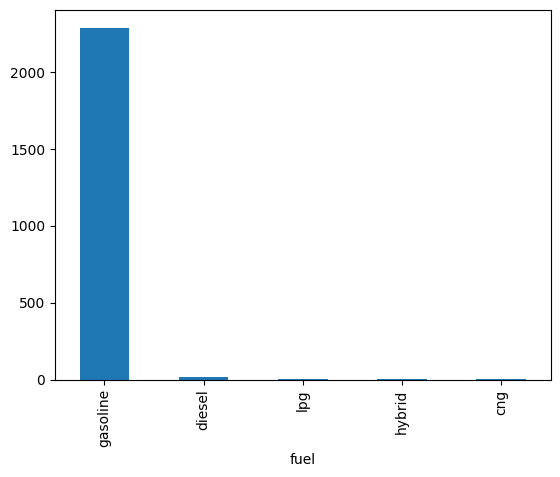

In [42]:
df['fuel'].value_counts().plot(kind='bar')

In [43]:
df['fuel'].value_counts()

fuel
gasoline    2290
diesel        17
lpg            7
hybrid         2
cng            1
Name: count, dtype: int64

In [44]:
df.sample(1)

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,age
1797,1230,volkswagen,polo,2007,86000,1600,at,2wd,rhd,gasoline,17


## **`drive`**

In [45]:
df['drive'].value_counts()

drive
2wd    2121
4wd     191
awd       5
Name: count, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            2317 non-null   int64 
 1   mark             2317 non-null   object
 2   model            2317 non-null   object
 3   year             2317 non-null   int64 
 4   mileage          2317 non-null   int64 
 5   engine_capacity  2317 non-null   int64 
 6   transmission     2317 non-null   object
 7   drive            2317 non-null   object
 8   hand_drive       2317 non-null   object
 9   fuel             2317 non-null   object
 10  age              2317 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 199.2+ KB


In [47]:
numeric_col=df.select_dtypes(include=[np.number])

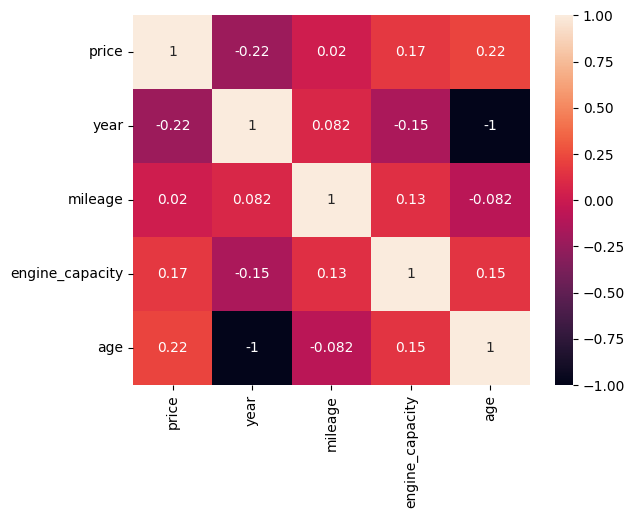

In [48]:
sns.heatmap(numeric_col.corr(),annot=True);

In [49]:
df.sample(1)

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,age
977,933,toyota,vitz,2005,43000,1300,at,2wd,rhd,gasoline,19


In [50]:
df.drop(columns=['age'],inplace=True,axis=1)

In [51]:
df.sample(1)

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
708,821,honda,accord,2005,59263,2000,at,2wd,rhd,gasoline


<Axes: xlabel='price', ylabel='Count'>

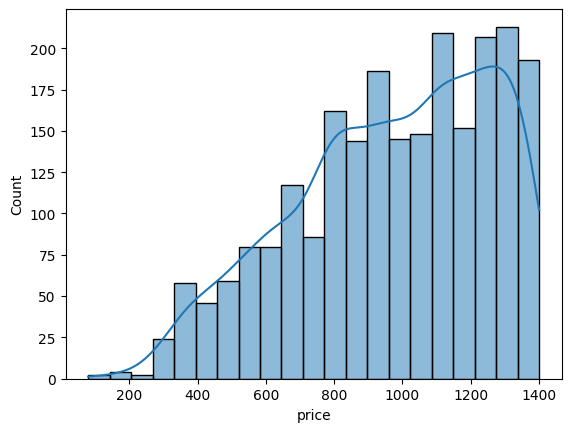

In [52]:
sns.histplot(df['price'],kde=True,palette='cool')

In [53]:
df=df[df['mark']!=('citroen', 'land rover', 'hino')]

In [54]:
X = df.drop(columns=['price','mark','model'])
y = df['price']

In [55]:
X.head()

,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,2003,80000,1240,at,2wd,rhd,gasoline
1,2010,53000,1200,at,2wd,rhd,gasoline
2,2005,47690,2000,at,2wd,rhd,gasoline
3,2008,130661,1990,at,2wd,rhd,gasoline
4,2006,66300,660,at,2wd,rhd,gasoline


In [56]:
y

0         80
1        110
2        165
3        190
4        190
        ... 
2312    1400
2313    1400
2314    1400
2315    1400
2316    1400
Name: price, Length: 2317, dtype: int64

In [57]:
# calling train_test_split() to get the training and testing data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)

# split sizes
print(X_train.shape)
print(X_test.shape)

(1853, 7)
(464, 7)


In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# numeric_columns = X.select_dtypes(include=['number']).columns
# categorical_columns = X.select_dtypes(include=['object']).columns

# using column transformer to make step1 of scaling, encoding, function transformer, imputer etc to build pipelines.
step1 = ColumnTransformer(transformers=[
    ('col_tnf', StandardScaler(),[0,1,2]),
    ('col_tnf2', OneHotEncoder(handle_unknown='ignore', drop='first'),[3,4,5,6]),
],remainder='passthrough')



# display pipeline

from sklearn import set_config
set_config(display='diagram')

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# apply LinearRegression algorithm as step2

step2 = LinearRegression()


# make pipeline
pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe1.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe1.predict(X_train)
y_pred = pipe1.predict(X_test)

# display pipeline diagram
display(pipe1)

# LinearRegression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 2]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [3, 4, 5, 6])])),
                ('step2', LinearRegression())])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.07762859284524004
Adjusted R2 score 0.07412908073137381


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.047896265677157546
Adjusted R2 score 0.03328063817658755


The performance metrics
-----------------------------------------
MAE 232.9965117253275
MSE 80290.7745344223
RMSE 283.3562678580135


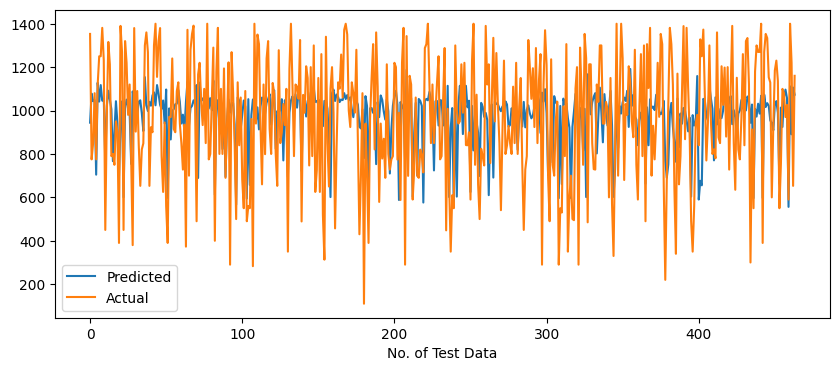

In [67]:
# Plot the figure
plt.figure(figsize=(10,4))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`Ridge Regression(L2) with hyperparameter tuning`**

In [68]:
# apply RidgeRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,3,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

Reg_ridge = GridSearchCV(Ridge(), parameters, cv=10)

step2 = Reg_ridge

# make pipeline
pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe2.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe2.predict(X_train)
y_pred = pipe2.predict(X_test)

# display pipeline diagram
display(pipe2)

# Ridge Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_ridge.best_params_)
print('cross-validation score', Reg_ridge.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 2]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [3, 4, 5, 6])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=Ridge(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    3, 5, 8, 12, 15, 18, 21,
                                                    25]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.07748106683659184
Adjusted R2 score 0.07398099500345157


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.04956300529684399
Adjusted R2 score 0.0349729637114885


Cross-validation score and best params
-----------------------------------------
The best parameters is {'alpha': 1}
cross-validation score 0.06621273376216778


The performance metrics
-----------------------------------------
MAE 232.71194454760905
MSE 80150.21861578911
RMSE 283.10813943754624


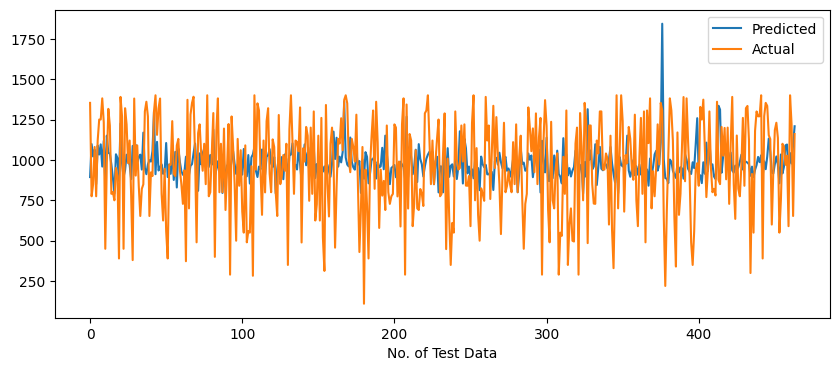

In [69]:
# Plot the figure
plt.figure(figsize=(10,4))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`Lasso Regression(L1) with hyperparameter tuning`**

In [70]:
# apply LassoRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.linear_model import Lasso

Reg_Lasso = GridSearchCV(Lasso(), parameters, cv=10)

step2 = Reg_Lasso

# make pipeline
pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe3.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe3.predict(X_train)
y_pred = pipe3.predict(X_test)

# display pipeline diagram
display(pipe3)

# Lasso Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_Lasso.best_params_)
print('cross-validation score', Reg_Lasso.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 2]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [3, 4, 5, 6])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=Lasso(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    2, 3, 4, 5, 8, 12, 15, 18,
                                                    21, 25]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.07742810129534139
Adjusted R2 score 0.0739278285089281


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.04977708286385252
Adjusted R2 score 0.03519032755693796


Cross-validation score and best params
-----------------------------------------
The best parameters is {'alpha': 0.1}
cross-validation score 0.06650095700085165


The performance metrics
-----------------------------------------
MAE 232.72486587382207
MSE 80132.16548455358
RMSE 283.07625383375694


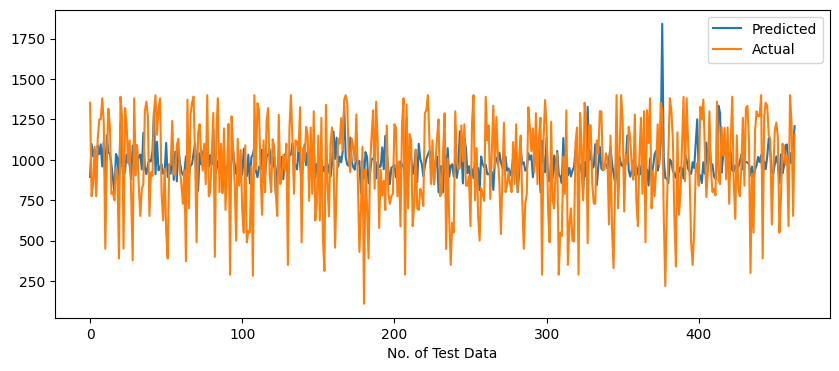

In [71]:
# Plot the figure
plt.figure(figsize=(10,4))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`DecisionTreeRegressor with Hyperparameter tuning`**

In [72]:
# apply DecisionTreeRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'criterion':['squared_error'],     # 'friedman_mse', 'absolute_error'
    'splitter' :['best'],              # random
    'max_depth' :[6],                  #4,5,6,7,8,9,None
    'max_features' :[1.0]              #0.25,0.50,0.75,0.85
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

dtr = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = dtr

# make pipeline
pipe4 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe4.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe4.predict(X_train)
y_pred = pipe4.predict(X_test)

# display pipeline diagram
display(pipe4)

# DecisionTreeRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", dtr.best_params_)
print('cross-validation score', dtr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 2]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [3, 4, 5, 6])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                              n_jobs=-1,
                              param_grid={'criterion': ['squared_error'],
                                          'max_depth': [6],
                                          'max_features': [1.0],
                                          'splitter': ['best']}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.2655132442311341
Adjusted R2 score 0.26272657361304086


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.09528629632253671
Adjusted R2 score 0.08139814736257567


Cross-validation score and best params
-----------------------------------------
The best parameters is {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 1.0, 'splitter': 'best'}
cross-validation score 0.09392939475855362


The performance metrics
-----------------------------------------
MAE 224.27985185526694
MSE 76294.37988900722
RMSE 276.2143730673826


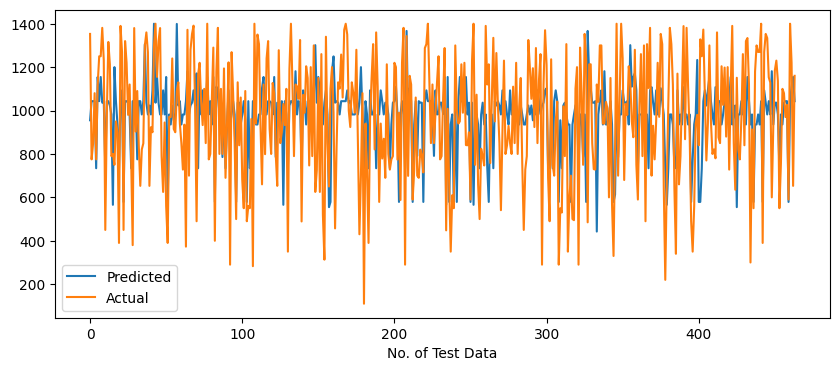

In [73]:
# Plot the figure
plt.figure(figsize=(10,4))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`RandomForestRegressor with hyperparameter tuning`**

In [63]:
# apply RandomForestRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators':[58],      # 50,55,60,70,80,90,100
    'max_depth' :[6],         # 4,5,6,7,8,9,None
    'max_features' :[None],   # 'sqrt','log2'
    'max_samples' :[0.85]     # 0.40,0.50,0.60,0.70,0.75,0.85,1.0
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

rfr = GridSearchCV(RandomForestRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = rfr

# make pipeline
pipe5 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe5.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe5.predict(X_train)
y_pred = pipe5.predict(X_test)

# display pipeline diagram
display(pipe5)

# RandomForestRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", rfr.best_params_)
print('cross-validation score', rfr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 2]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [3, 4, 5, 6])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'max_depth': [6],
                                          'max_features': [None],
                                          'max_samples': [0.85],
                                          'n_estimators': [58]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.31584956377013695
Adjusted R2 score 0.3132538710581537


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.16116875660782526
Adjusted R2 score 0.1482919612048752


Cross-validation score and best params
-----------------------------------------
The best parameters is {'max_depth': 6, 'max_features': None, 'max_samples': 0.85, 'n_estimators': 58}
cross-validation score 0.16643473174198103


The performance metrics
-----------------------------------------
MAE 216.02820233319935
MSE 70738.5212426788
RMSE 265.96714316373516


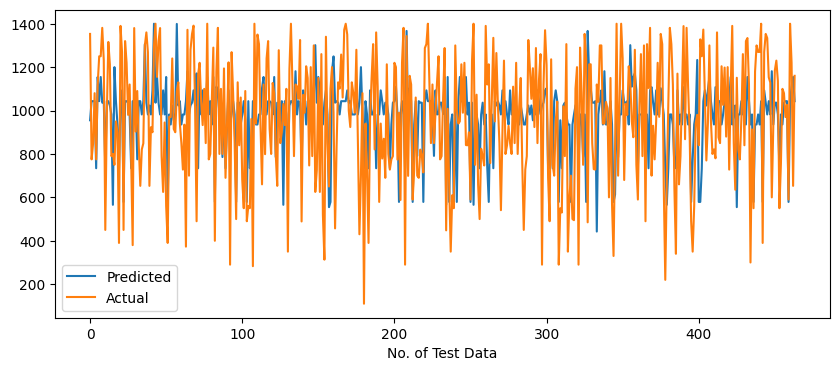

In [74]:
# Plot the figure
plt.figure(figsize=(10,4))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`AdaBoostRegressor with hyperparameter tuning`**

In [75]:
# apply AdaBoostRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[200],                         # 50,80,120,160,180,200,220,240
    'learning_rate' :[0.01],                       # 0.0001,0.001,0.01,0.1,1
    'loss' :['linear']                             # 'linear', 'square', 'exponential'
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor

abr = GridSearchCV(AdaBoostRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = abr

# make pipeline
pipe6 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe6.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe6.predict(X_train)
y_pred = pipe6.predict(X_test)

# display pipeline diagram
display(pipe6)

# AdaBoostRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", abr.best_params_)
print('cross-validation score', abr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 2]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [3, 4, 5, 6])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
                              param_grid={'learning_rate': [0.01],
                                          'loss': ['linear'],
                                          'n_estimators': [200]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.1746145450188018
Adjusted R2 score 0.17148300128716587


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.14120383713965534
Adjusted R2 score 0.12802056270978168


Cross-validation score and best params
-----------------------------------------
The best parameters is {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 200}
cross-validation score 0.1397631118326789


The performance metrics
-----------------------------------------
MAE 224.60904110728396
MSE 72422.160104527
RMSE 269.1136564809133


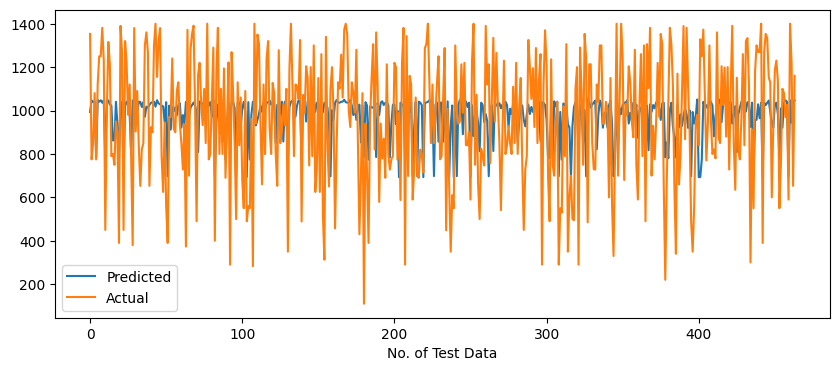

In [76]:
# Plot the figure
plt.figure(figsize=(10,4))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`GradientBoostingRegressor with hyperparameter tuning`**

In [77]:
# apply GradientBoostingRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[160],                                                        # 60,100,140,160,180,200,220
    'learning_rate' :[0.05],                                                      # 0.001,0.01,0.05,0.1,1.0
    'max_depth' :[7],                                                             # 4,5,6,7,8
    'max_leaf_nodes' :[8]                                                         # 4,6,8,12,16,20,24,32,None
    #'loss' :['squared_error']                                                    # 'squared_error', 'absolute_error', 'huber'
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr = GridSearchCV(GradientBoostingRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = gbr


# make pipeline
pipe7 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe7.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe7.predict(X_train)
y_pred = pipe7.predict(X_test)

# display pipeline diagram
display(pipe7)

# GradientBoostingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", gbr.best_params_)
print('cross-validation score', gbr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 2]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [3, 4, 5, 6])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                              n_jobs=-1,
                              param_grid={'learning_rate': [0.05],
                                          'max_depth': [7],
                                          'max_leaf_nodes': [8],
                                          'n_estimators': [160]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.332241321136003
Adjusted R2 score 0.32970781937337545


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.15361679441677412
Adjusted R2 score 0.14062406976966324


Cross-validation score and best params
-----------------------------------------
The best parameters is {'learning_rate': 0.05, 'max_depth': 7, 'max_leaf_nodes': 8, 'n_estimators': 160}
cross-validation score 0.16314312236222447


The performance metrics
-----------------------------------------
MAE 216.9703590203375
MSE 71375.37715628934
RMSE 267.1617060064734


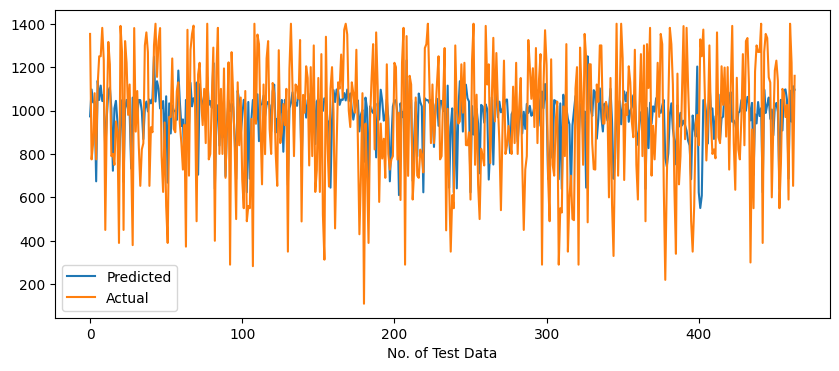

In [78]:
# Plot the figure
plt.figure(figsize=(10,4))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()